<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/04.10-Bergman-Minimal-Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bergman minimal model

This notebook shows how to use [`gekko`](https://gekko.readthedocs.io/en/latest/) to simulate a body insulin dynamics based on the
Bergman minimal model and it was very inspired in [here](https://www.nature.com/articles/s41598-022-16535-2).

\begin{align*}
\frac{dG(t)}{dt} &= D(t) -p_1[G(t) - G_b] - G(t)X(t) \\
\frac{dX(t)}{dt} &= p_3[I(t) - I_b] - p_2X(t) \\
\frac{dI(t)}{dt} &= u(t) - n[I(t) - I_b]
\end{align*}

In [32]:
!pip install gekko
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

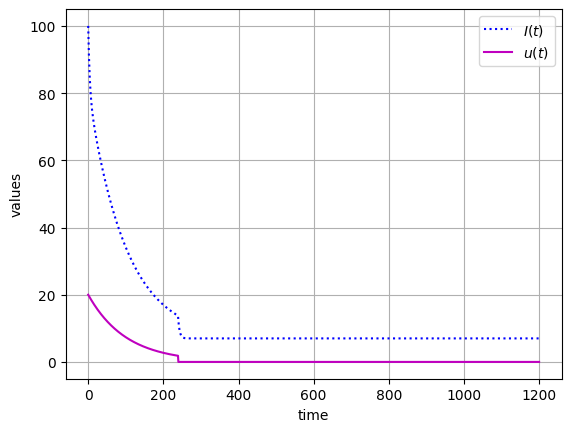

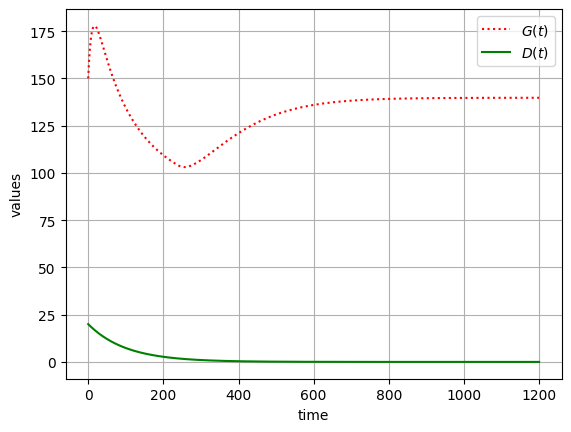

In [102]:
# model creation
m = GEKKO(remote=False)

# model parameters
p_1 = m.Const()
p_2 = m.Const()
p_3 = m.Const()
G_b = m.Const()
I_b = m.Const()
n   = m.Const()

# model input variable(s)
u = m.Param()
D = m.Param()

# model output variable(s)
G = m.Var(150.0)
X = m.Var(0.1)
I = m.Var(100.0)

# model equations
m.Equation(G.dt() == -p_1*(G - G_b) - G*X + D)
m.Equation(X.dt() == -p_2*X + p_3*(I - I_b))
m.Equation(I.dt() == -n*(I - I_b) + u)

# simulation time
tfinal = 1200
npoints = tfinal+1
m.time = np.linspace(0,tfinal,npoints)

# model parameters definition
p_1.value = 0.0
p_2.value = 0.0142
p_3.value = 1.5e-5
G_b.value = 90.0
I_b.value = 7.0
n.value = 0.2814

# model input definition
D.value = np.array([20*np.exp(-0.01*t) for t in m.time])
u.value = np.array([20*np.exp(-0.01*t) for t in m.time])
u.value[240:] = 0.0

# solve ODE
m.options.IMODE = 4
m.solve(disp=False)

# plot results
plt.plot(m.time,I.value,'b:',label='$I(t)$')
plt.plot(m.time,u.value,'m-',label='$u(t)$')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()
plt.show()

plt.plot(m.time,G.value,'r:',label='$G(t)$')
plt.plot(m.time,D.value,'g-',label='$D(t)$')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()